In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas.plotting import scatter_matrix

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'), index=ts.index)

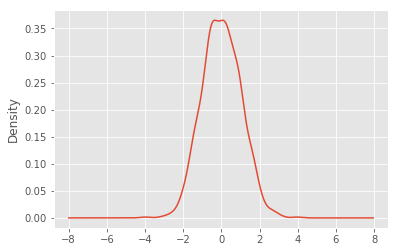

In [5]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

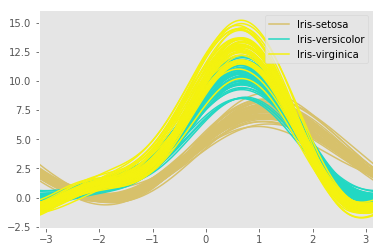

In [6]:
from pandas.plotting import andrews_curves
data = pd.read_csv('Documents/iris.csv')
plt.figure()
andrews_curves(data, 'Name')

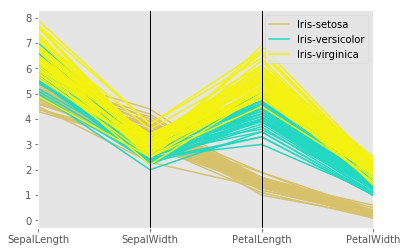

In [7]:
from pandas.plotting import parallel_coordinates
data = pd.read_csv('Documents/iris.csv')
plt.figure()
parallel_coordinates(data, 'Name')

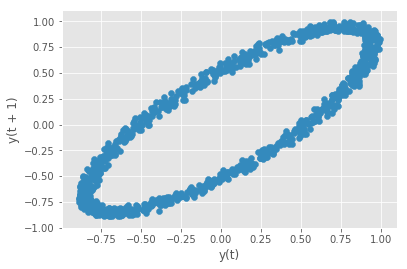

In [8]:
from pandas.plotting import lag_plot

plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

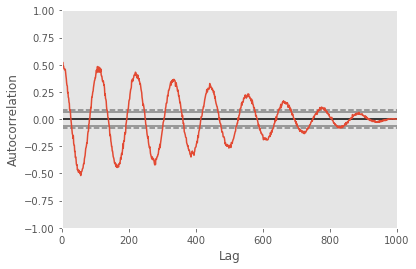

In [9]:
from pandas.plotting import autocorrelation_plot

plt.figure()
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

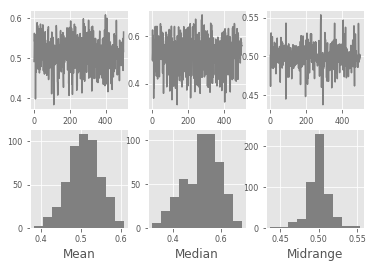

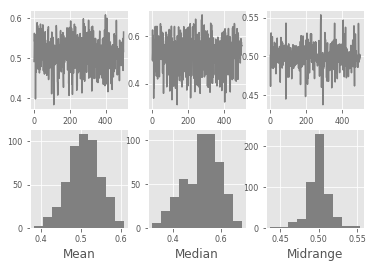

In [10]:
from pandas.plotting import bootstrap_plot

data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='gray')

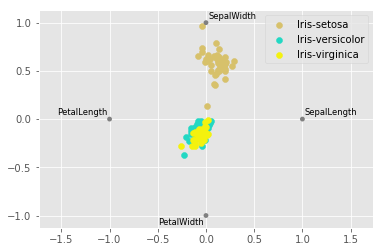

In [11]:
from pandas.plotting import radviz

data = pd.read_csv('Documents/iris.csv')
plt.figure()
radviz(data, 'Name')

# Plot Formatting

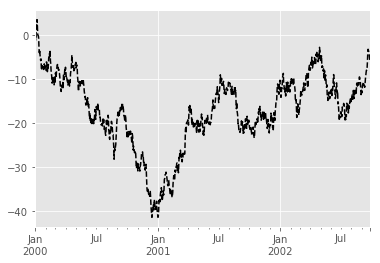

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

plt.figure()
ts.plot(style='k--', label='Series')

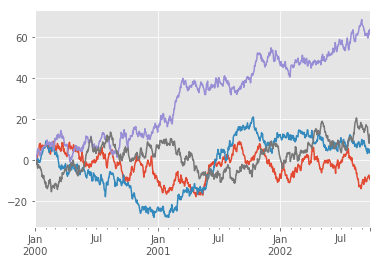

In [13]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=False)

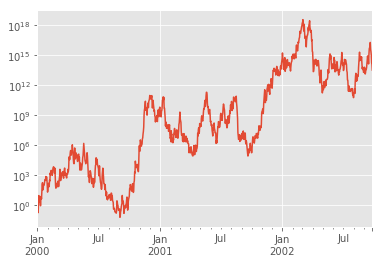

In [14]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)

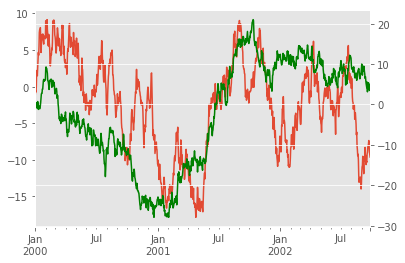

In [15]:
df.A.plot()
df.B.plot(secondary_y=True, style='g')

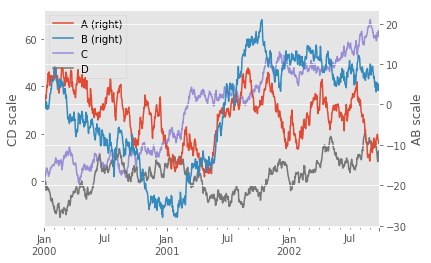

In [16]:
plt.figure()
ax = df.plot(secondary_y=['A', 'B'])
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

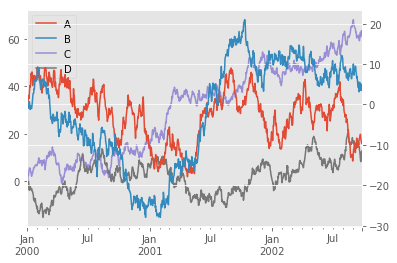

In [18]:
plt.figure()
df.plot(secondary_y=['A', 'B'], mark_right=False)

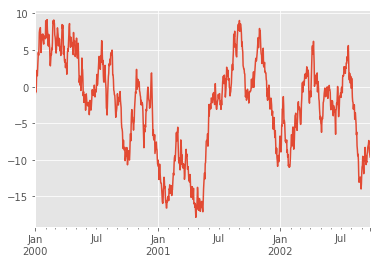

In [19]:
plt.figure()
df.A.plot()

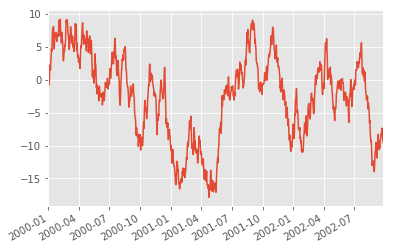

In [20]:
plt.figure()
df.A.plot(x_compat=True)

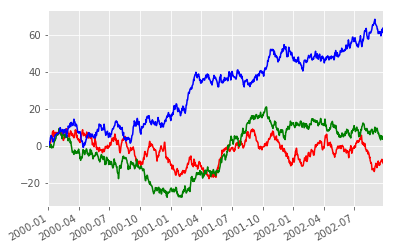

In [21]:
plt.figure()
with pd.plotting.plot_params.use('x_compat', True):
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde93d5df60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fde93a66ef0>], dtype=object)

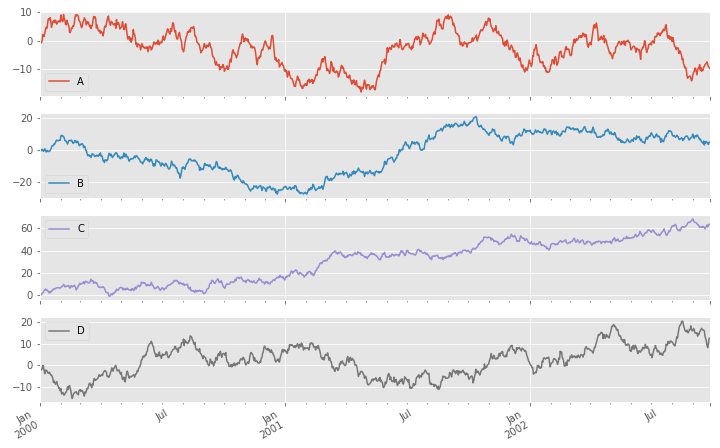

In [22]:
df.plot(subplots=True, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9376b1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fde93605128>]], dtype=object)

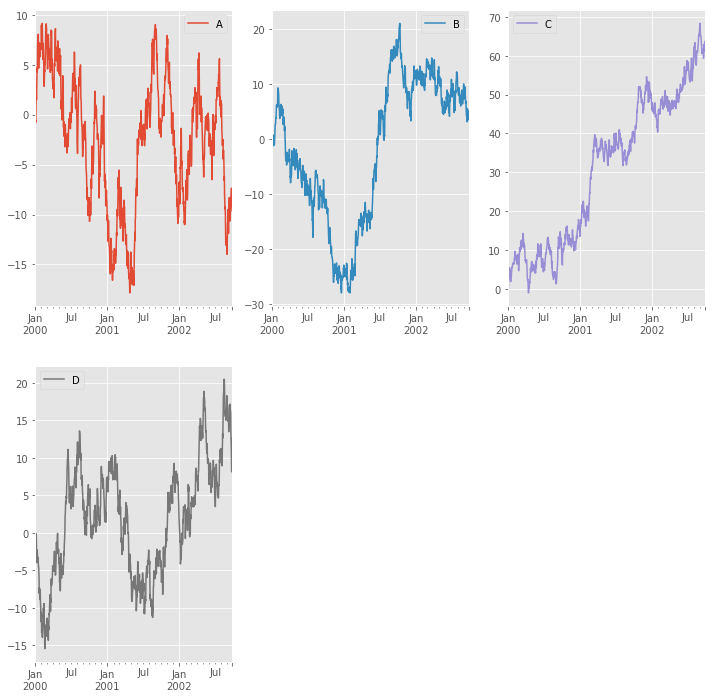

In [23]:
df.plot(subplots=True, layout=(2, 3), figsize=(12, 12), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde915b7c88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fde91994828>], dtype=object)

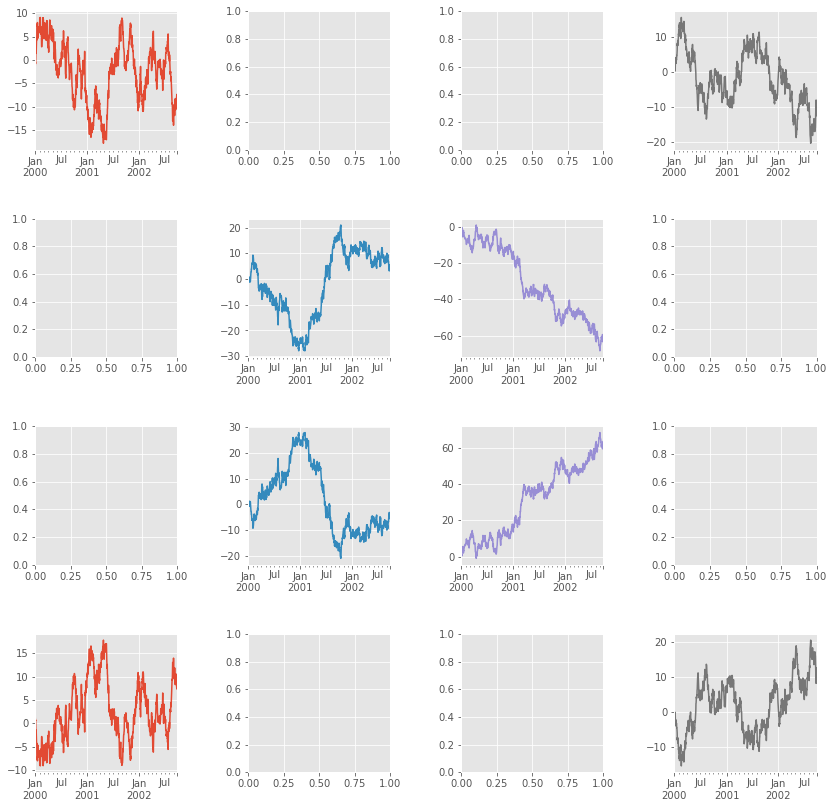

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 获取两个对角线的图例对象
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False)
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)

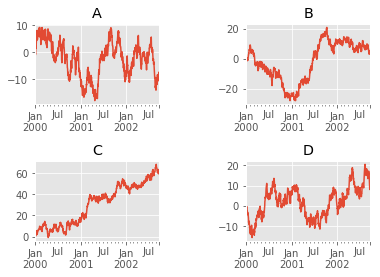

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.7, hspace=0.7)
df['A'].plot(ax=axes[0][0])
axes[0, 0].set_title('A')
df['B'].plot(ax=axes[0][1])
axes[0, 1].set_title('B')
df['C'].plot(ax=axes[1][0])
axes[1, 0].set_title('C')
df['D'].plot(ax=axes[1][1])
axes[1, 1].set_title('D')

In [34]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
errors = gp3.std()

In [35]:
means

data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5

In [36]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

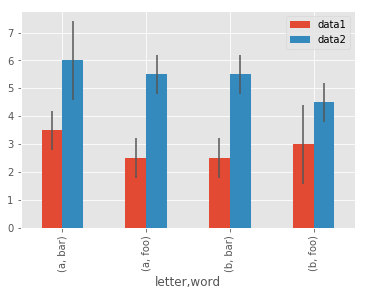

In [37]:
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax)

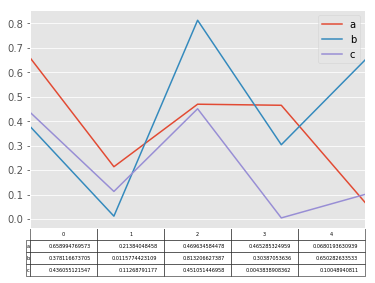

In [39]:
fig, ax = plt.subplots(1, 1)
df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])
ax.get_xaxis().set_visible(False)    # Hide Ticks
df.plot(table=True, ax=ax)

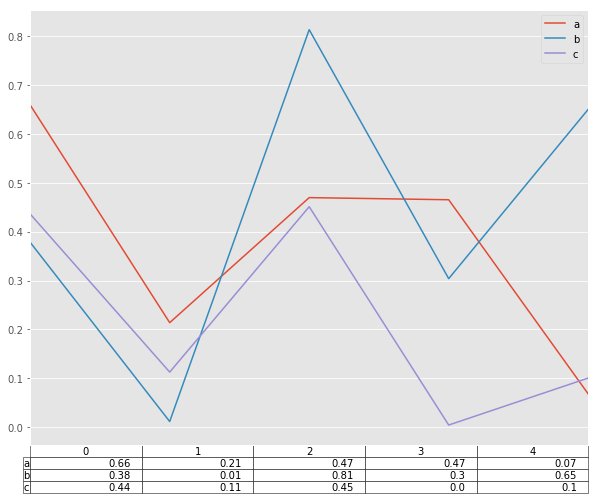

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.get_xaxis().set_visible(False)
df.plot(table=np.round(df.T, 2), ax=ax)

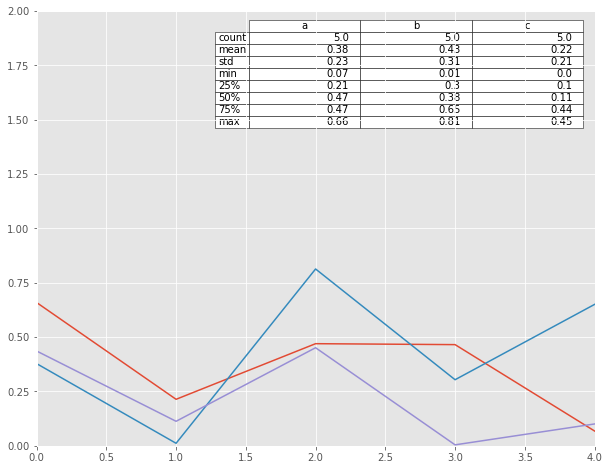

In [45]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
table(ax, np.round(df.describe(), 2), loc='upper right', colWidths=[0.2, 0.2, 0.2])
df.plot(ax=ax, ylim=(0, 2), legend=None)

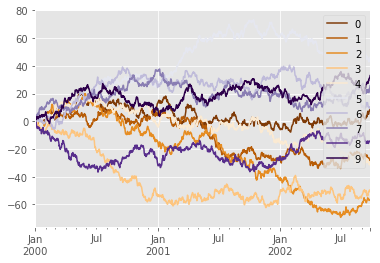

In [48]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)
df = df.cumsum()
plt.figure()
df.plot(colormap='PuOr')

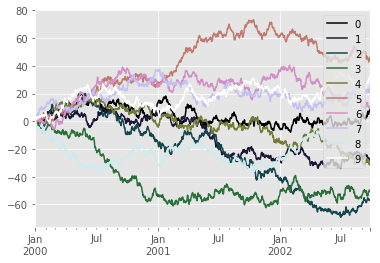

In [49]:
from matplotlib import cm

plt.figure()
df.plot(colormap=cm.cubehelix)

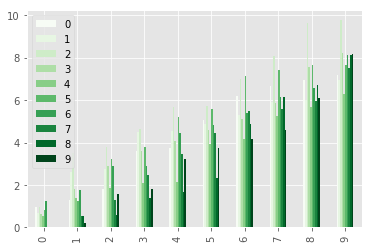

In [51]:
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()
plt.figure()
dd.plot.bar(colormap='Greens')

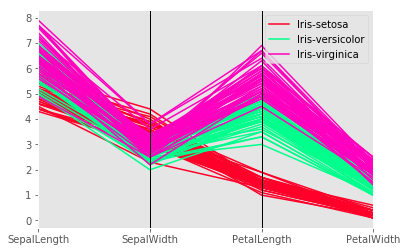

In [52]:
plt.figure()
parallel_coordinates(data, 'Name', colormap='gist_rainbow')

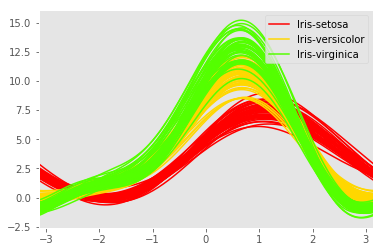

In [54]:
plt.figure()
andrews_curves(data, 'Name', colormap='prism')

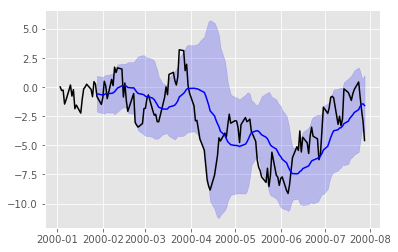

In [57]:
price = pd.Series(np.random.randn(150).cumsum(), index=pd.date_range('2000-1-1', periods=150, freq='B'))
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

# 使用seaborn

In [58]:
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

In [59]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

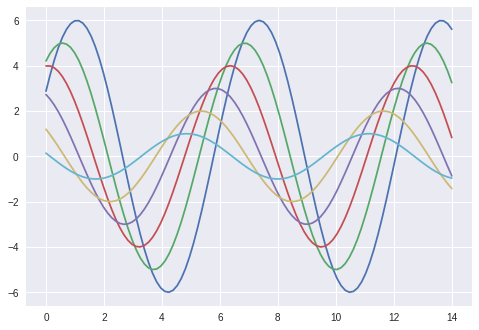

In [60]:
sinplot()

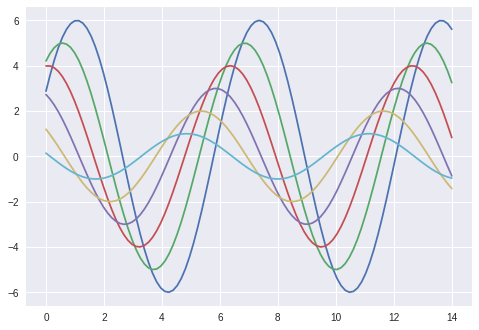

In [61]:
sns.set()
sinplot()

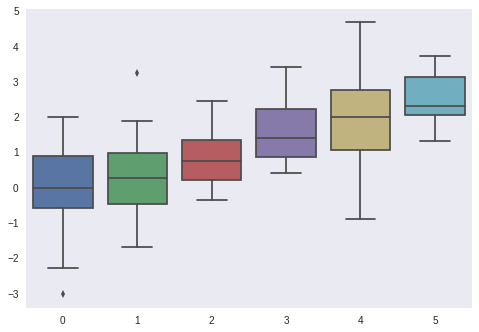

In [66]:
sns.set_style("dark")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

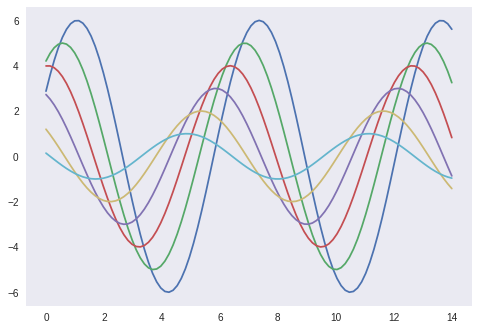

In [68]:
sns.set_style("dark")
sinplot()

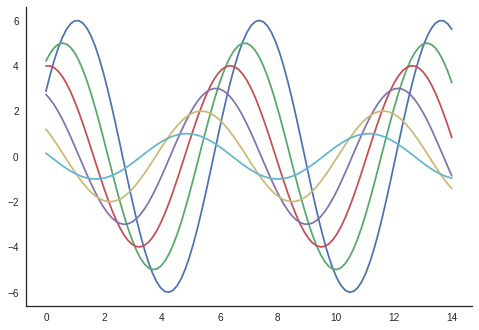

In [74]:
sns.set_style("white")
sinplot()
sns.despine()

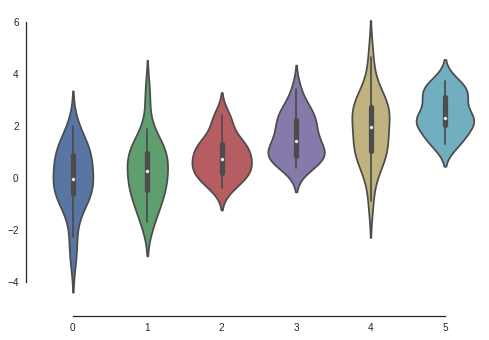

In [80]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(trim=True, offset=10)

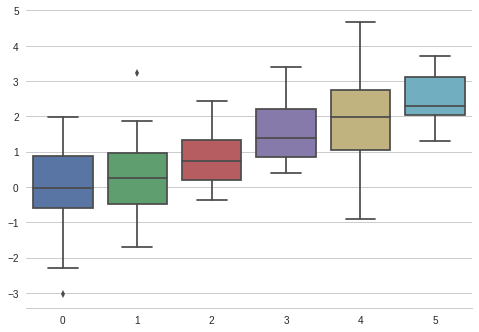

In [81]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

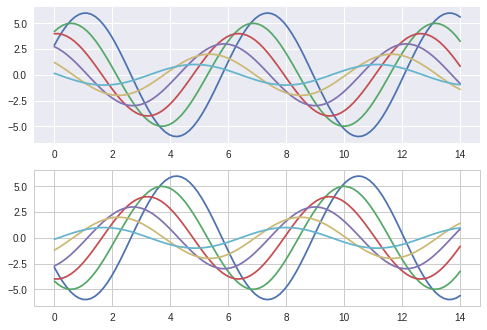

In [83]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

In [84]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

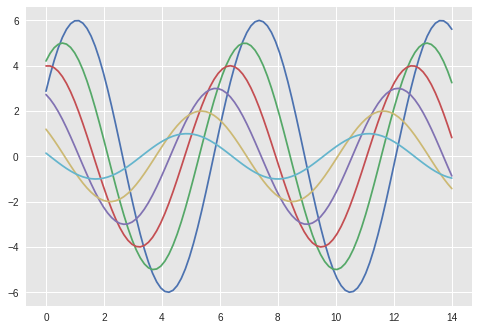

In [85]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

In [86]:
sns.set()

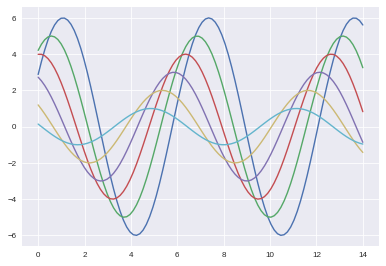

In [87]:
sns.set_context("paper")
sinplot()

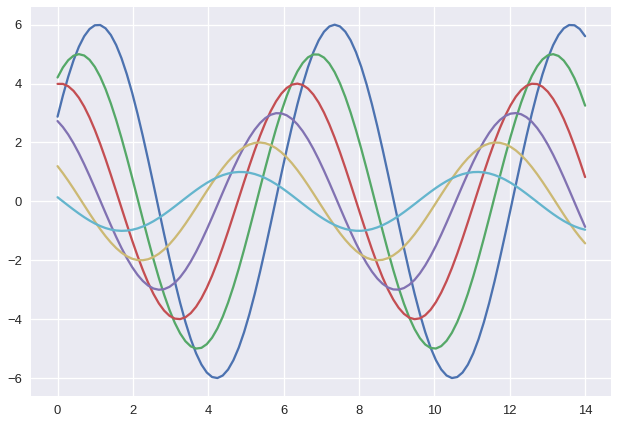

In [88]:
sns.set_context("talk")
sinplot()

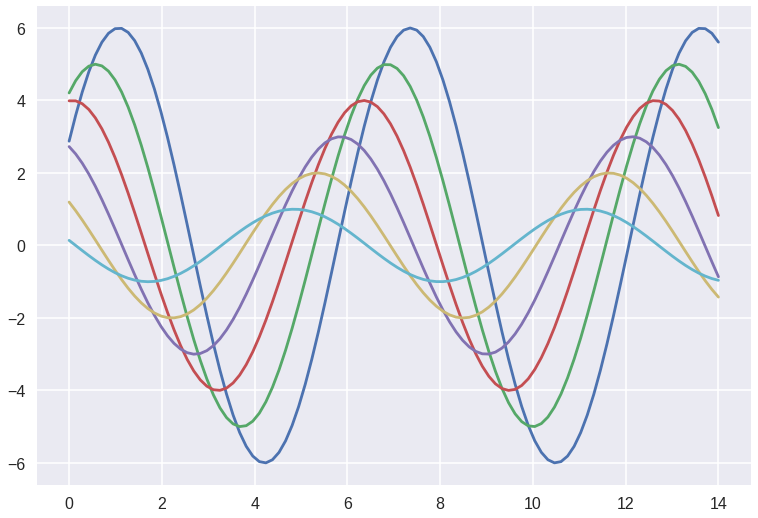

In [89]:
sns.set_context("poster")
sinplot()

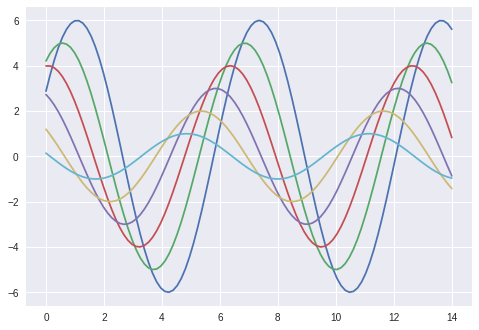

In [90]:
sns.set_context("notebook")
sinplot()

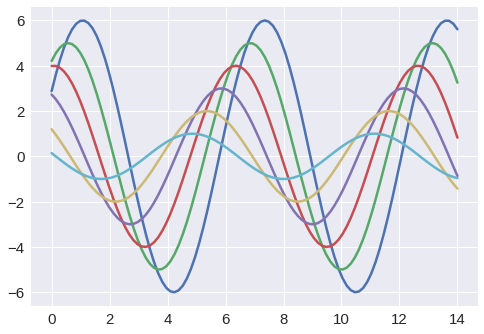

In [91]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()